In [19]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [4]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [7]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [16]:
univariate_column_label=['AEDAHO_T9_V2']
univariate_data_set=test_new.iloc[500:700][univariate_column_label] #just for checking whether it is working or not
print(univariate_data_set.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 11:33:00     42.305187
2019-04-11 11:32:00     42.480315
2019-04-11 11:31:00     42.343193
2019-04-11 11:30:00     42.108748
2019-04-11 11:29:00     42.292350


In [18]:
univariate_data=univariate_data_set.loc[::-1]
print(univariate_data.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00     42.152661
2019-04-11 08:15:00     42.268855
2019-04-11 08:16:00     43.134080
2019-04-11 08:17:00     42.618975
2019-04-11 08:18:00     42.481211


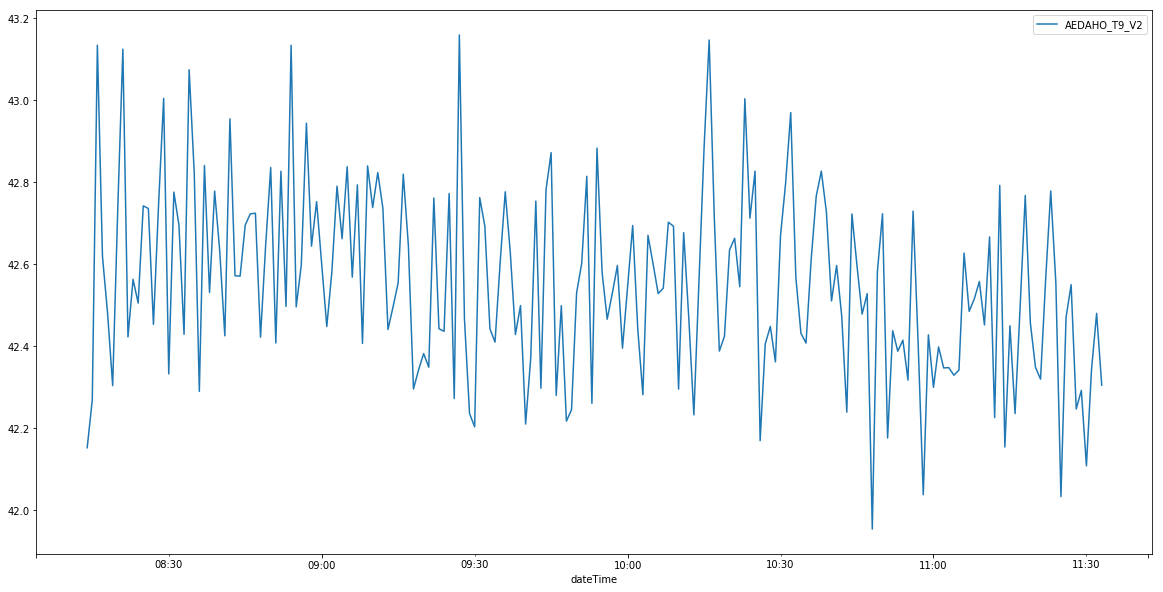

In [21]:
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [22]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
univariate_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,univariate_mean)

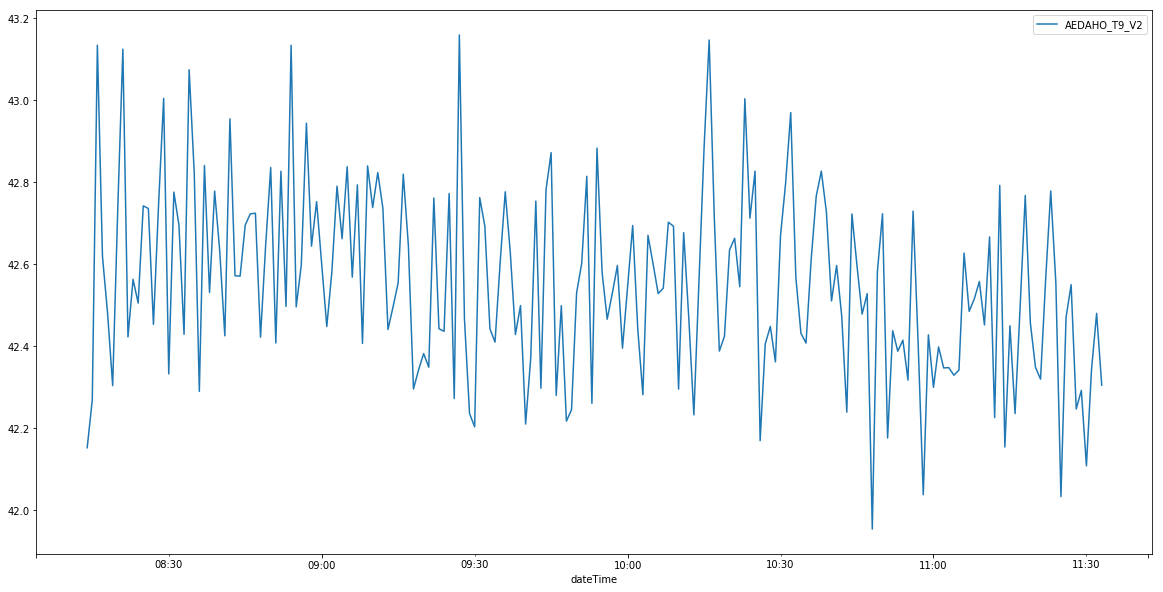

In [23]:
univariate_data_mean.plot()
plt.show()

In [68]:
# Determining rolling statistics
n=60
rolmean = univariate_data_mean.rolling(window=n).mean()

rolstd = univariate_data_mean.rolling(window=n).std()

print('rolmean: ',rolmean,'\nrolstd: ',rolstd)

rolmean:                       AEDAHO_T9_V2
dateTime                         
2019-04-11 08:14:00           NaN
2019-04-11 08:15:00           NaN
2019-04-11 08:16:00           NaN
2019-04-11 08:17:00           NaN
2019-04-11 08:18:00           NaN
2019-04-11 08:19:00           NaN
2019-04-11 08:20:00           NaN
2019-04-11 08:21:00           NaN
2019-04-11 08:22:00           NaN
2019-04-11 08:23:00           NaN
2019-04-11 08:24:00           NaN
2019-04-11 08:25:00           NaN
2019-04-11 08:26:00           NaN
2019-04-11 08:27:00           NaN
2019-04-11 08:28:00           NaN
2019-04-11 08:29:00           NaN
2019-04-11 08:30:00           NaN
2019-04-11 08:31:00           NaN
2019-04-11 08:32:00           NaN
2019-04-11 08:33:00           NaN
2019-04-11 08:34:00           NaN
2019-04-11 08:35:00           NaN
2019-04-11 08:36:00           NaN
2019-04-11 08:37:00           NaN
2019-04-11 08:38:00           NaN
2019-04-11 08:39:00           NaN
2019-04-11 08:40:00           NaN
2019

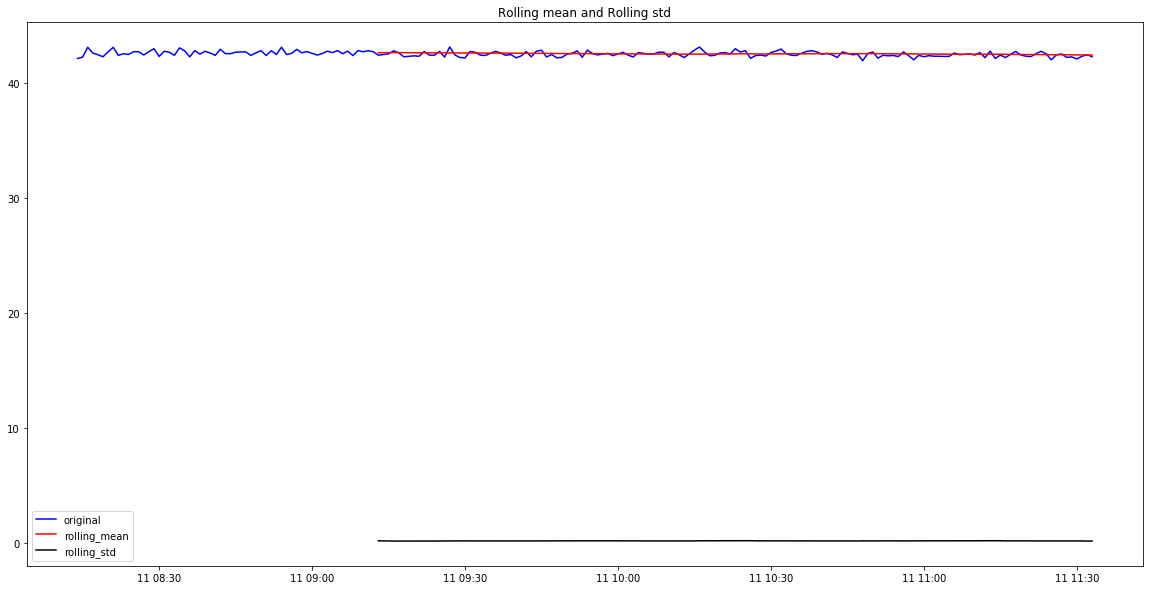

In [69]:
orig=plt.plot(univariate_data_mean,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling_mean')
std=plt.plot(rolstd,color='black',label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show(block=False)

In [70]:
# Perform DIckey fuller test

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller test: ')

dftest=adfuller(univariate_data_mean['AEDAHO_T9_V2'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value

    
print(dfoutput)

Results of Dickey Fuller test: 
Test Statistics                  -1.379544
P_value                           0.592043
#Lags_used                        9.000000
Numbers of observations used    190.000000
Critical value(1%)               -3.465244
Critical value(5%)               -2.876875
Critical value(10%)              -2.574945
dtype: float64


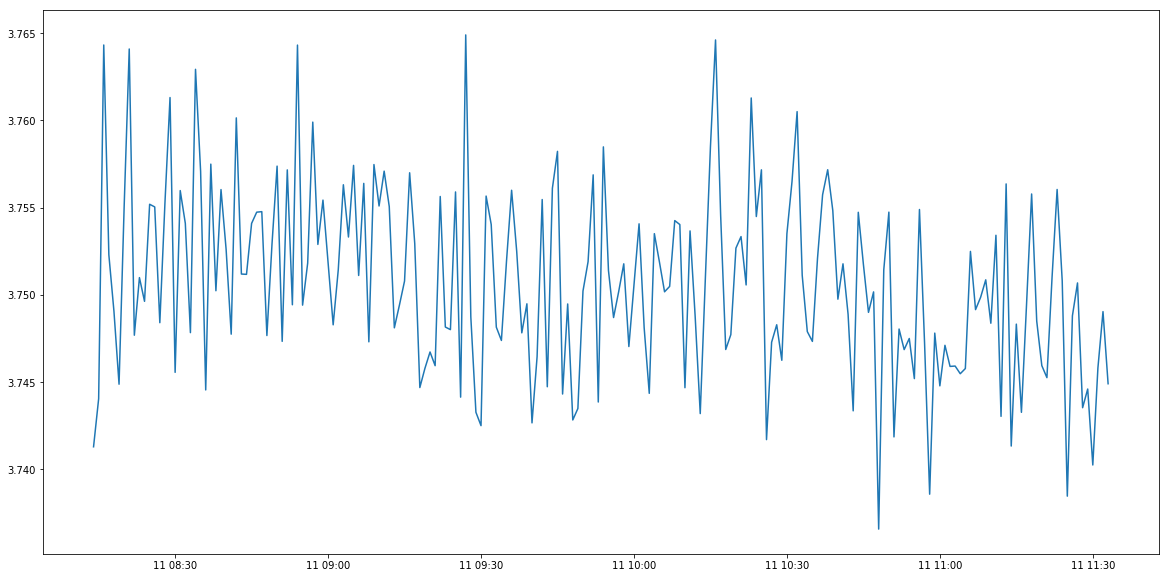

In [71]:
univariate_data_mean_logscale=np.log(univariate_data_mean)
plt.plot(univariate_data_mean_logscale)

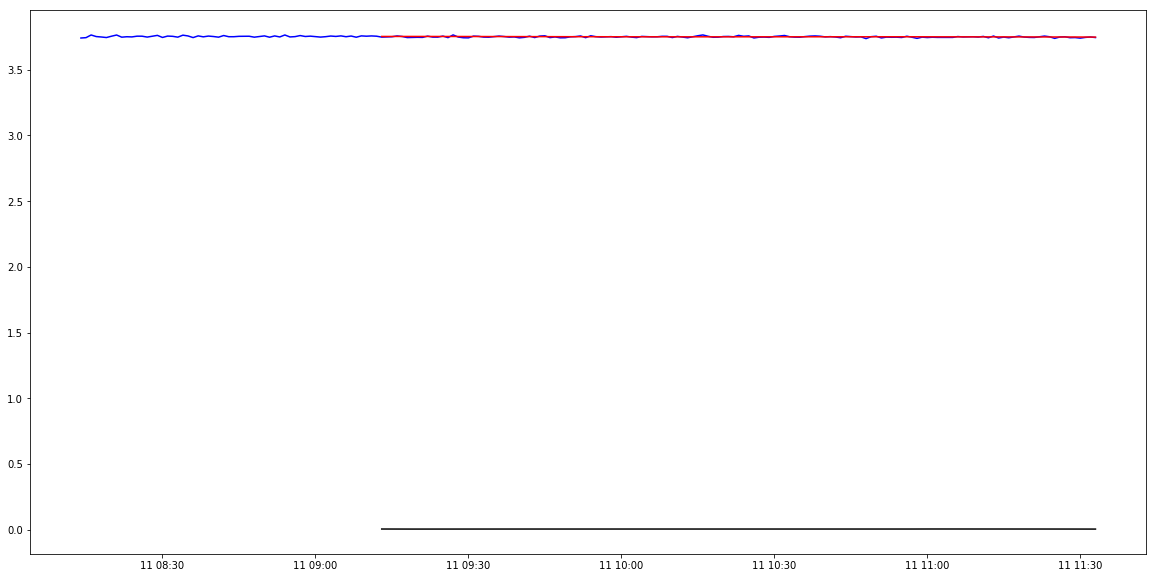

In [72]:
movingAverage=univariate_data_mean_logscale.rolling(window=n).mean()
movingStd=univariate_data_mean_logscale.rolling(window=n).std()

plt.plot(univariate_data_mean_logscale,color='blue')
plt.plot(movingAverage,color='red')
plt.plot(movingStd,color='black')

In [73]:
datasetLogScaleMinusMovingAverage=univariate_data_mean_logscale - movingAverage
datasetLogScaleMinusMovingAverage.head(60)

,AEDAHO_T9_V2
dateTime,
2019-04-11 08:14:00,NaN
2019-04-11 08:15:00,NaN
2019-04-11 08:16:00,NaN
2019-04-11 08:17:00,NaN
2019-04-11 08:18:00,NaN
2019-04-11 08:19:00,NaN
2019-04-11 08:20:00,NaN
2019-04-11 08:21:00,NaN
2019-04-11 08:22:00,NaN


In [74]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(60)

,AEDAHO_T9_V2
dateTime,
2019-04-11 09:13:00,-0.005031
2019-04-11 09:14:00,-0.003861
2019-04-11 09:15:00,-0.002599
2019-04-11 09:16:00,0.003725
2019-04-11 09:17:00,-0.000336
2019-04-11 09:18:00,-0.008516
2019-04-11 09:19:00,-0.007430
2019-04-11 09:20:00,-0.006355
2019-04-11 09:21:00,-0.006838


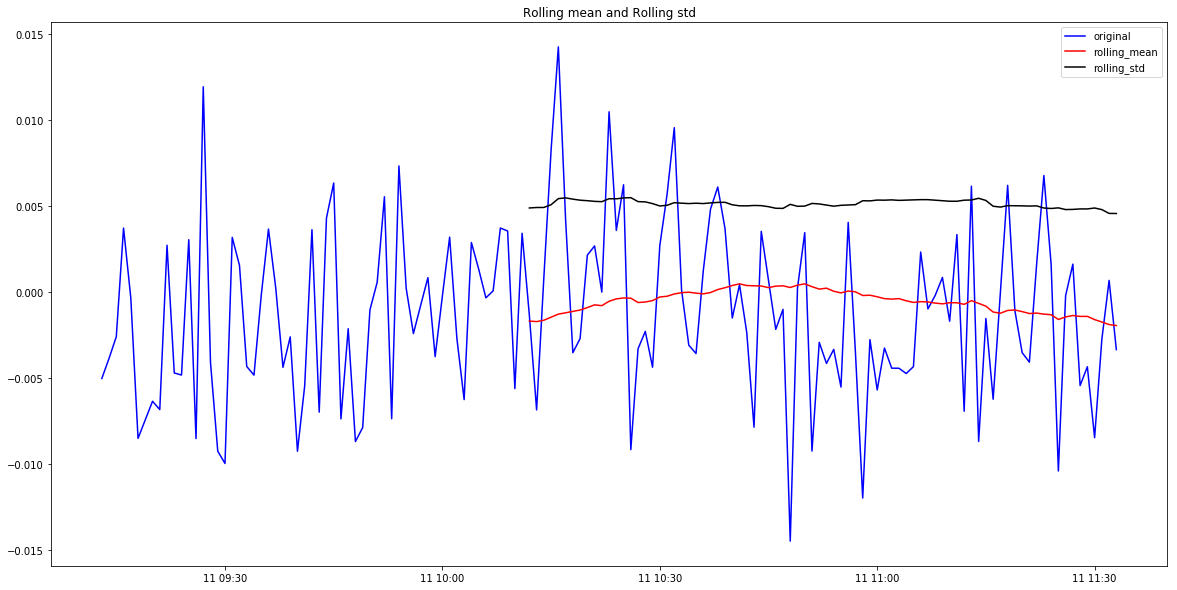

Results of Dickey Fuller test: 
Test Statistics                -1.064917e+01
P_value                         4.709532e-19
#Lags_used                      0.000000e+00
Numbers of observations used    1.400000e+02
Critical value(1%)             -3.477945e+00
Critical value(5%)             -2.882416e+00
Critical value(10%)            -2.577902e+00
dtype: float64


In [75]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    global n
    movingAverage=timeseries.rolling(window=n).mean()
    movingStd=timeseries.rolling(window=n).std()
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='rolling_mean')
    std=plt.plot(movingStd,color='black',label='rolling_std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling std')
    plt.show(block=False)
    
    
    print('Results of Dickey Fuller test: ')

    dftest=adfuller(timeseries['AEDAHO_T9_V2'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value

    print(dfoutput)
    
test_stationarity(datasetLogScaleMinusMovingAverage)

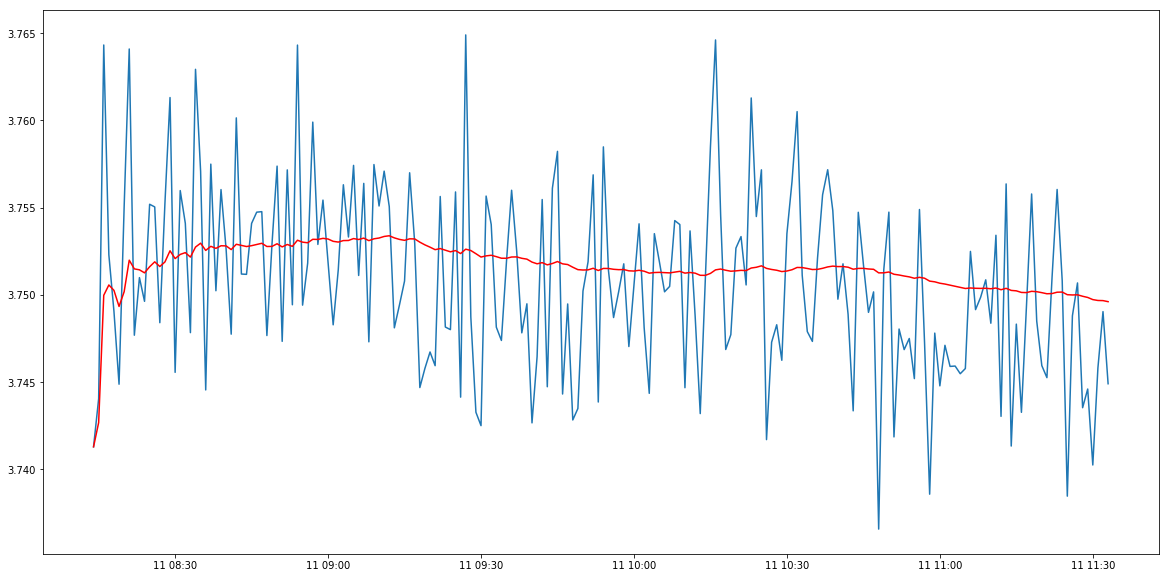

In [76]:
exponentialDecayWeightedAverage=univariate_data_mean_logscale.ewm(halflife=n,min_periods=0,adjust=True).mean()
plt.plot(univariate_data_mean_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [77]:
datasetLogScaleMinusMovingExponentialDecayAverage=univariate_data_mean_logscale - exponentialDecayWeightedAverage

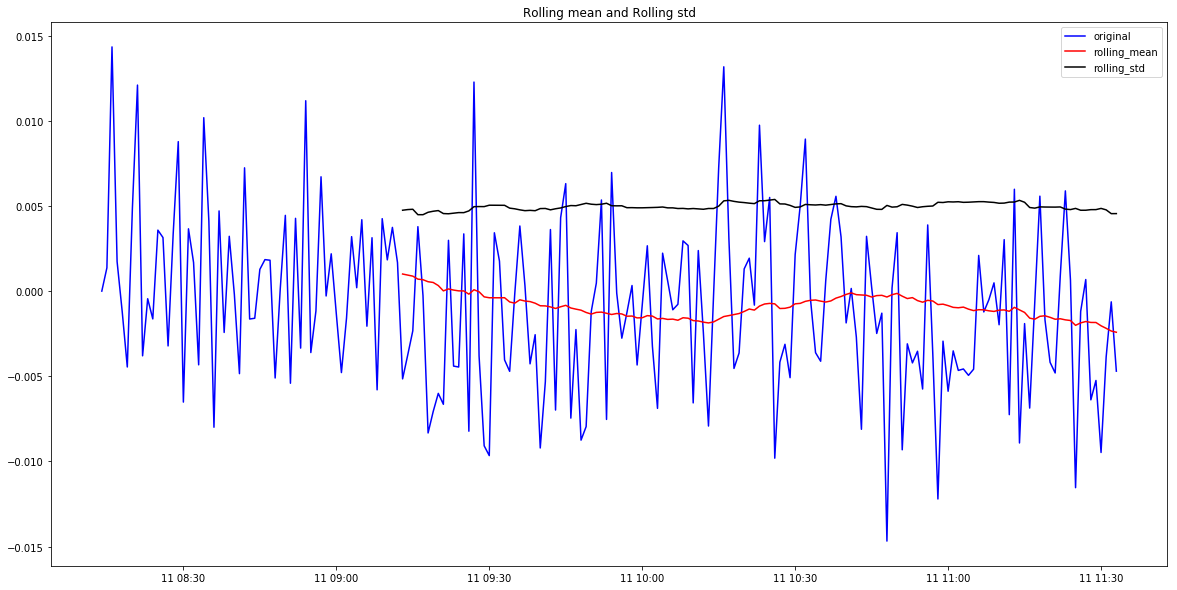

Results of Dickey Fuller test: 
Test Statistics                -1.366936e+01
P_value                         1.469735e-25
#Lags_used                      0.000000e+00
Numbers of observations used    1.990000e+02
Critical value(1%)             -3.463645e+00
Critical value(5%)             -2.876176e+00
Critical value(10%)            -2.574572e+00
dtype: float64


In [78]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

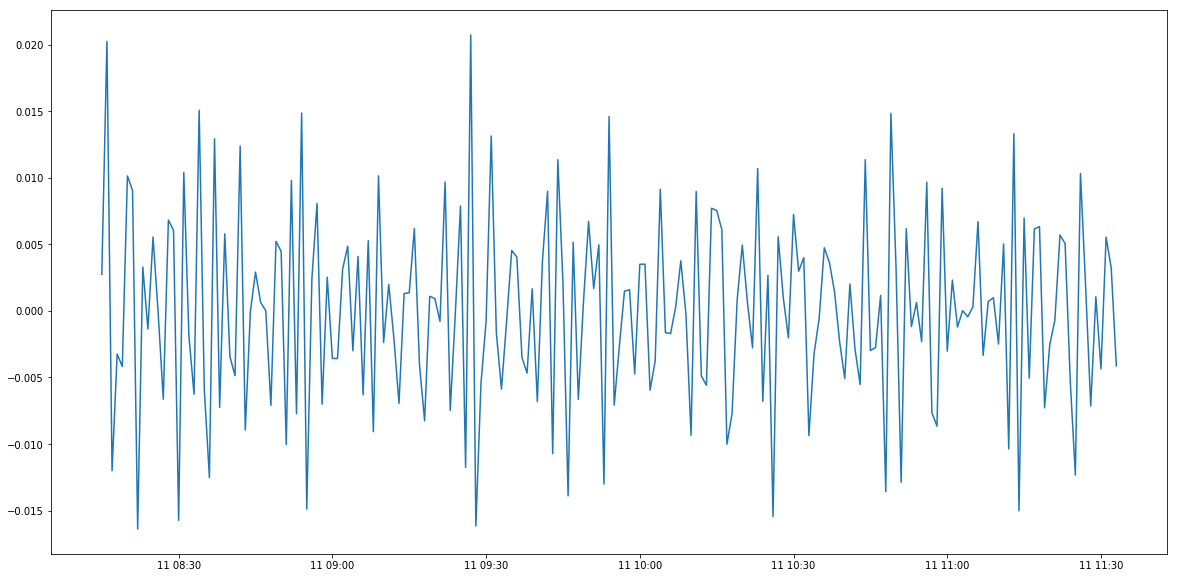

In [79]:
datasetLogDiffShifting=univariate_data_mean_logscale - univariate_data_mean_logscale.shift()
plt.plot(datasetLogDiffShifting)

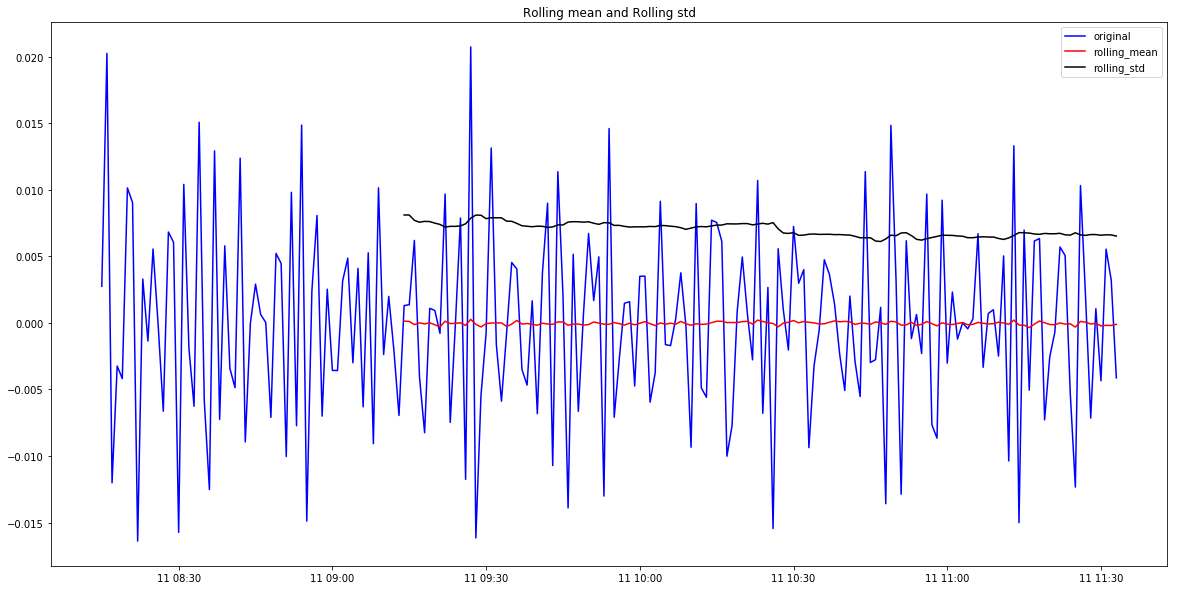

Results of Dickey Fuller test: 
Test Statistics                -8.871622e+00
P_value                         1.392987e-14
#Lags_used                      8.000000e+00
Numbers of observations used    1.900000e+02
Critical value(1%)             -3.465244e+00
Critical value(5%)             -2.876875e+00
Critical value(10%)            -2.574945e+00
dtype: float64


In [80]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


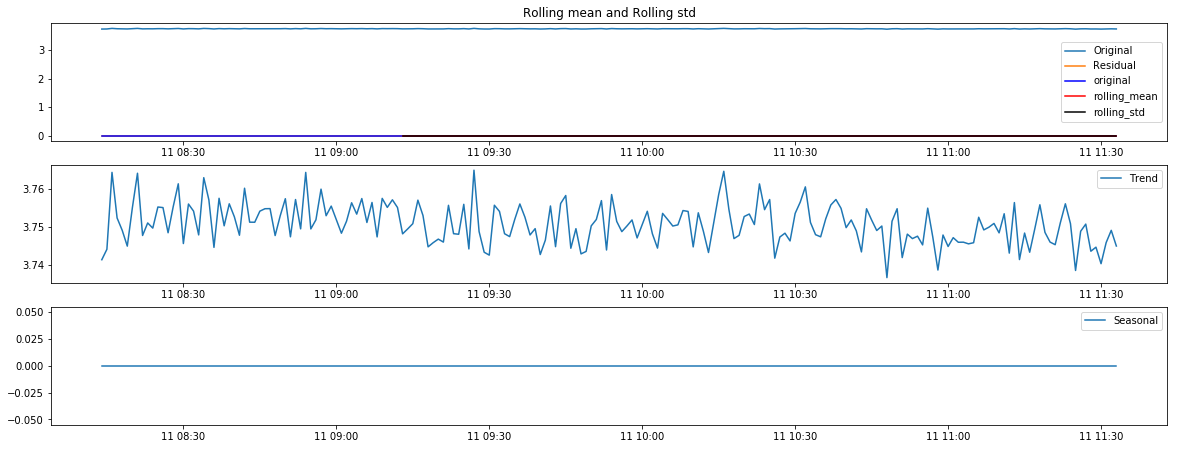

Results of Dickey Fuller test: 
Test Statistics                        NaN
P_value                                NaN
#Lags_used                        0.000000
Numbers of observations used    199.000000
Critical value(1%)               -3.463645
Critical value(5%)               -2.876176
Critical value(10%)              -2.574572
dtype: float64


In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(univariate_data_mean_logscale,freq=1)

trend = decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(univariate_data_mean_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(411)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

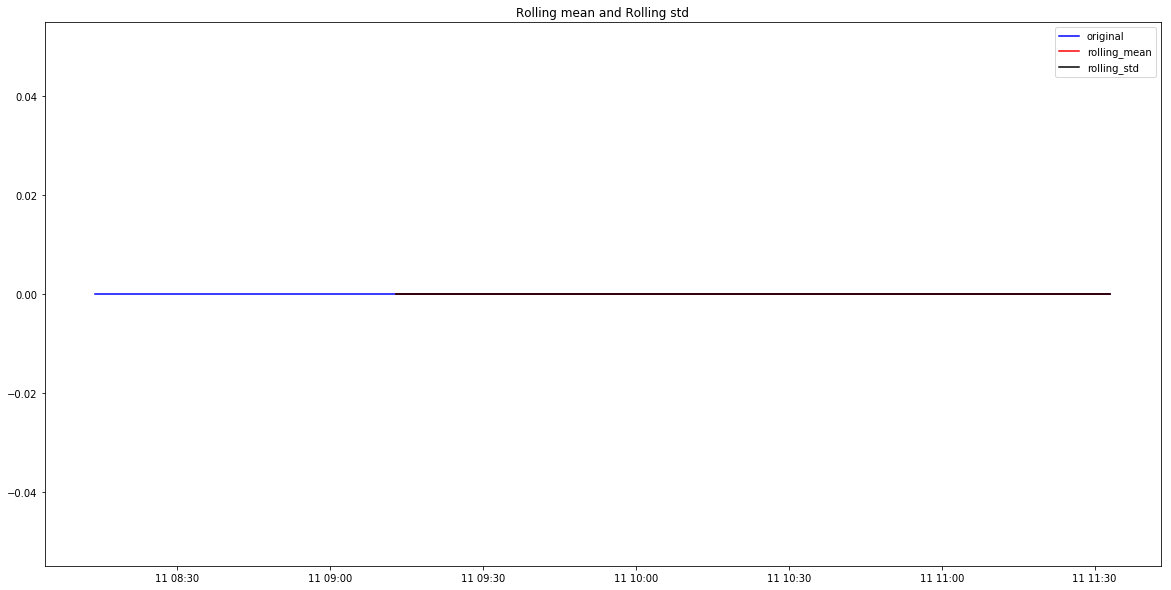

Results of Dickey Fuller test: 
Test Statistics                        NaN
P_value                                NaN
#Lags_used                        0.000000
Numbers of observations used    199.000000
Critical value(1%)               -3.463645
Critical value(5%)               -2.876176
Critical value(10%)              -2.574572
dtype: float64


In [82]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

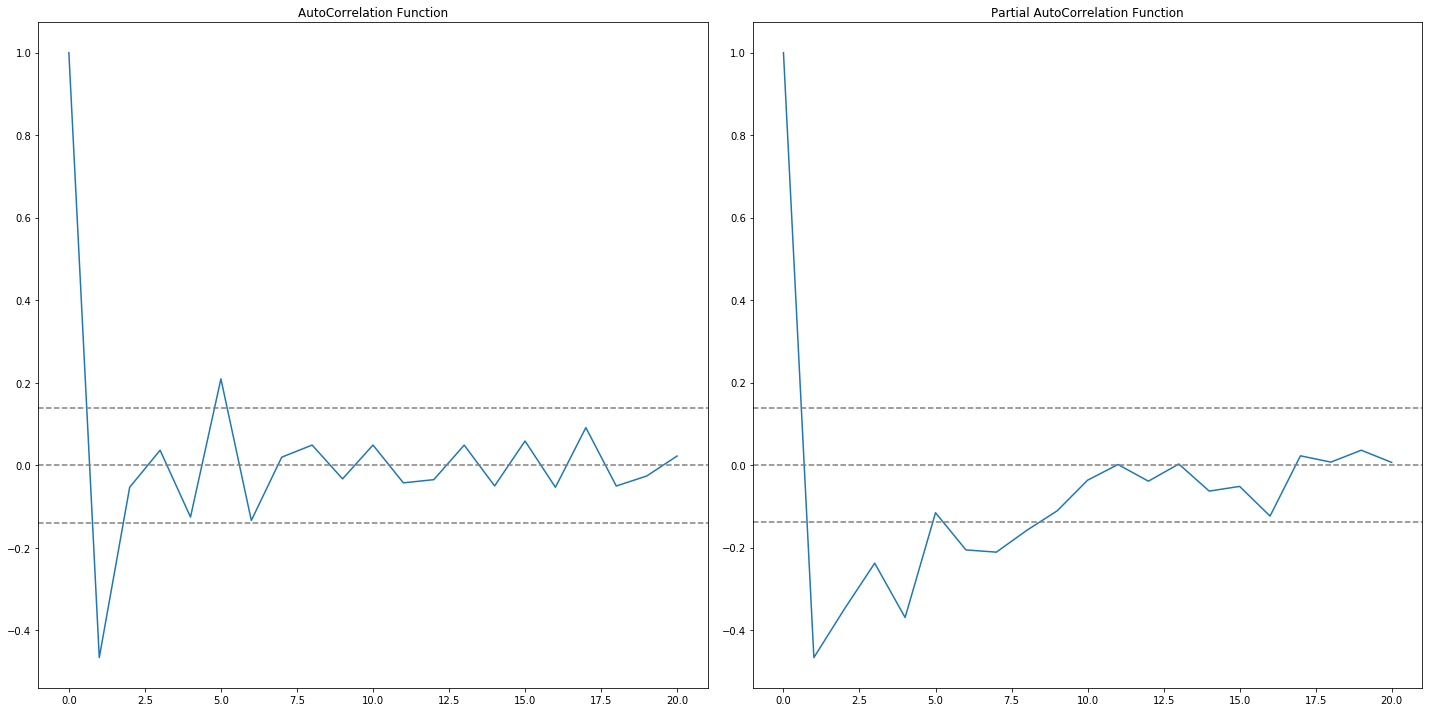

In [84]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

log_acf=acf(datasetLogDiffShifting,nlags=20)
log_pacf= pacf(datasetLogDiffShifting,nlags=20, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

#plot PACF

plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting AR model


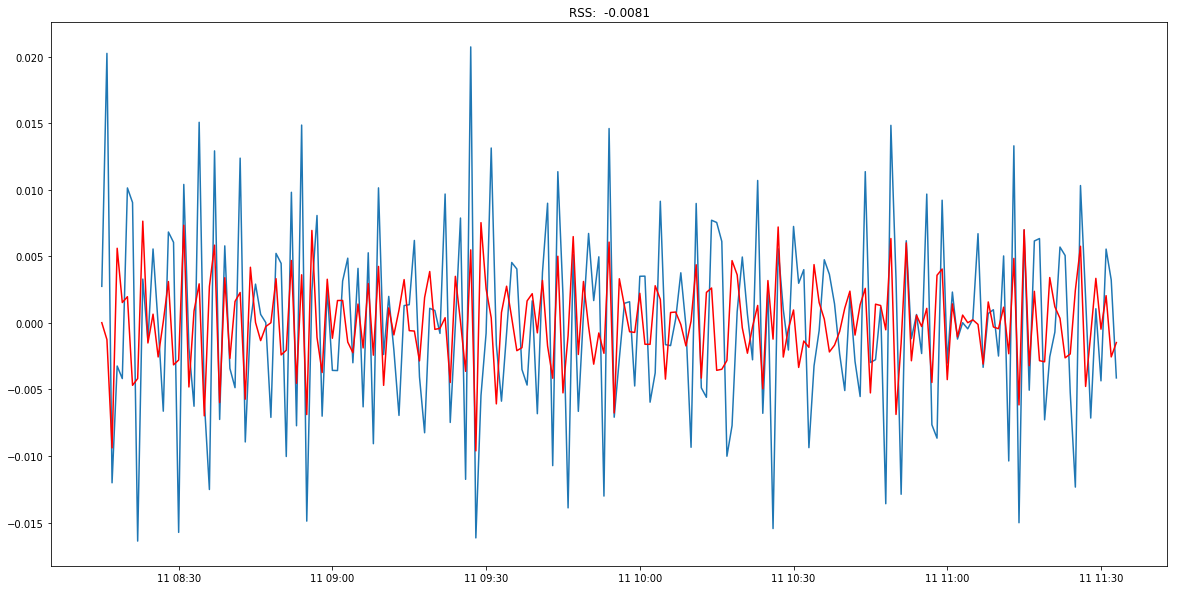

In [99]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

#AR model

model =ARIMA(univariate_data_mean_logscale,order=(1,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_AR.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting MA model


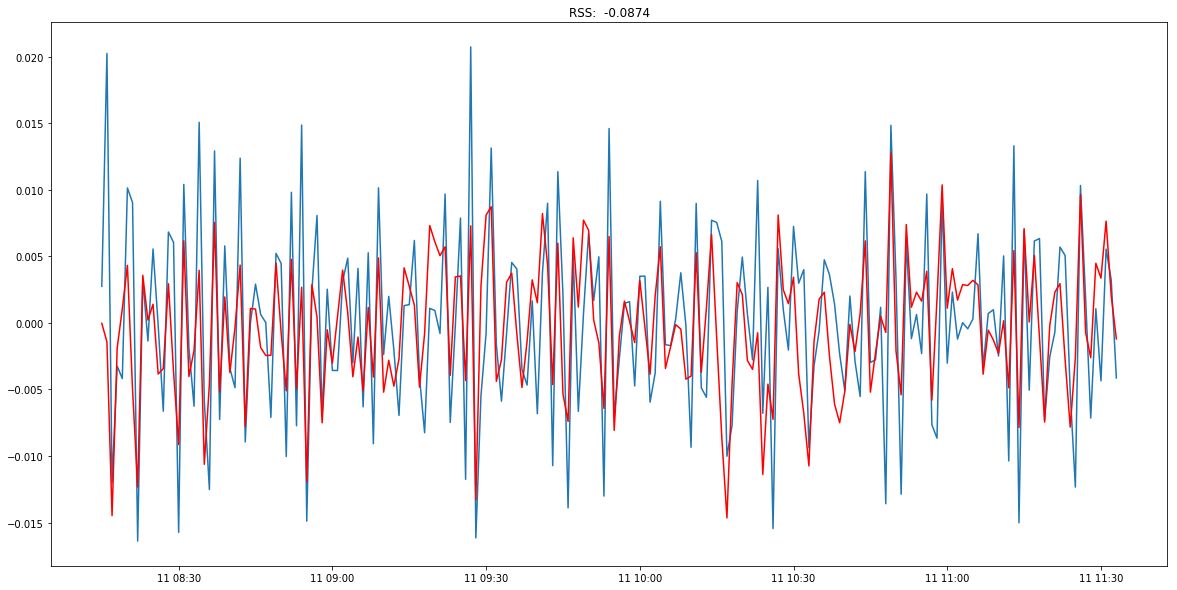

In [98]:
# MA model

model =ARIMA(univariate_data_mean_logscale,order=(0,1,1))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_MA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting MA model')

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting AR model


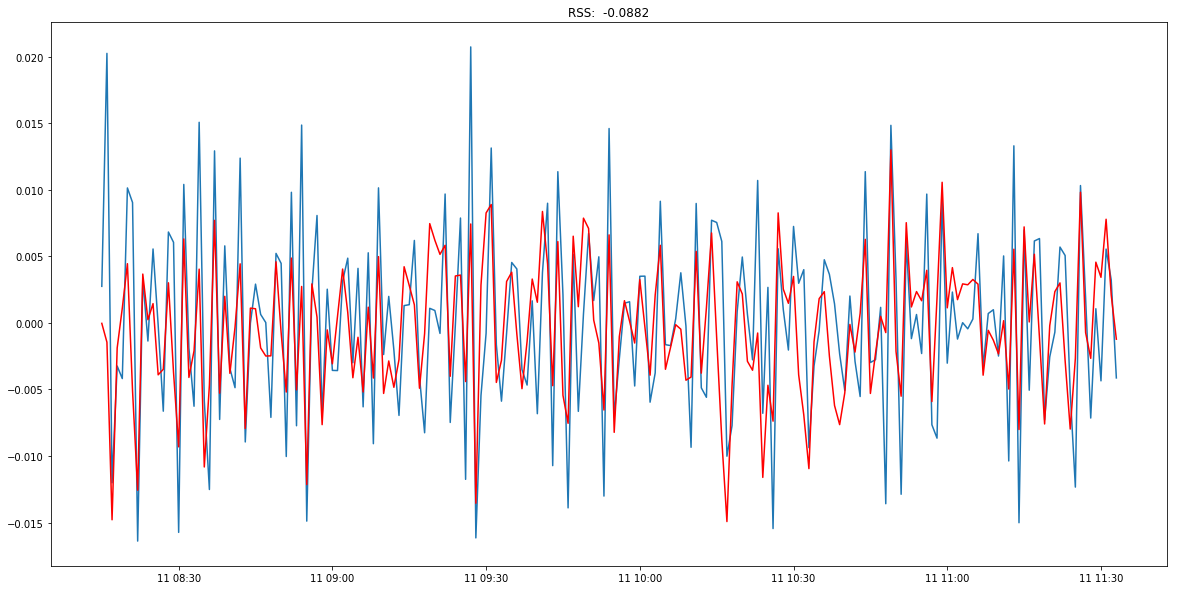

In [101]:


model =ARIMA(univariate_data_mean_logscale,order=(1,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_ARIMA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

In [102]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

dateTime
2019-04-11 08:15:00   -0.000029
2019-04-11 08:16:00   -0.001446
2019-04-11 08:17:00   -0.014793
2019-04-11 08:18:00   -0.001882
2019-04-11 08:19:00    0.001114
dtype: float64


In [103]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

dateTime
2019-04-11 08:15:00   -0.000029
2019-04-11 08:16:00   -0.001475
2019-04-11 08:17:00   -0.016269
2019-04-11 08:18:00   -0.018151
2019-04-11 08:19:00   -0.017037
dtype: float64


In [104]:
predictions_ARIMA_log = pd.Series(univariate_data_mean_logscale['AEDAHO_T9_V2'].ix[0], index=univariate_data_mean_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
print(predictions_ARIMA_log.head())

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


dateTime
2019-04-11 08:14:00    3.741298
2019-04-11 08:15:00    3.741269
2019-04-11 08:16:00    3.739822
2019-04-11 08:17:00    3.725029
2019-04-11 08:18:00    3.723147
dtype: float64


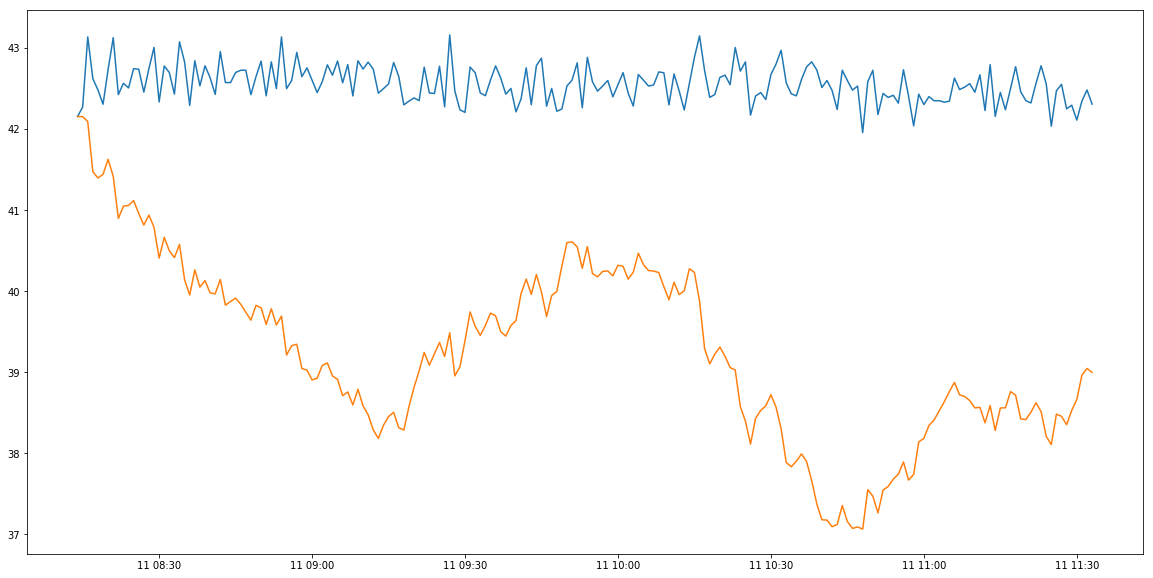

In [105]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(univariate_data_mean)
plt.plot(predictions_ARIMA)

In [106]:
univariate_data_mean_logscale

,AEDAHO_T9_V2
dateTime,
2019-04-11 08:14:00,3.741298
2019-04-11 08:15:00,3.744051
2019-04-11 08:16:00,3.764313
2019-04-11 08:17:00,3.752300
2019-04-11 08:18:00,3.749062
2019-04-11 08:19:00,3.744882
2019-04-11 08:20:00,3.755031
2019-04-11 08:21:00,3.764084
2019-04-11 08:22:00,3.747689


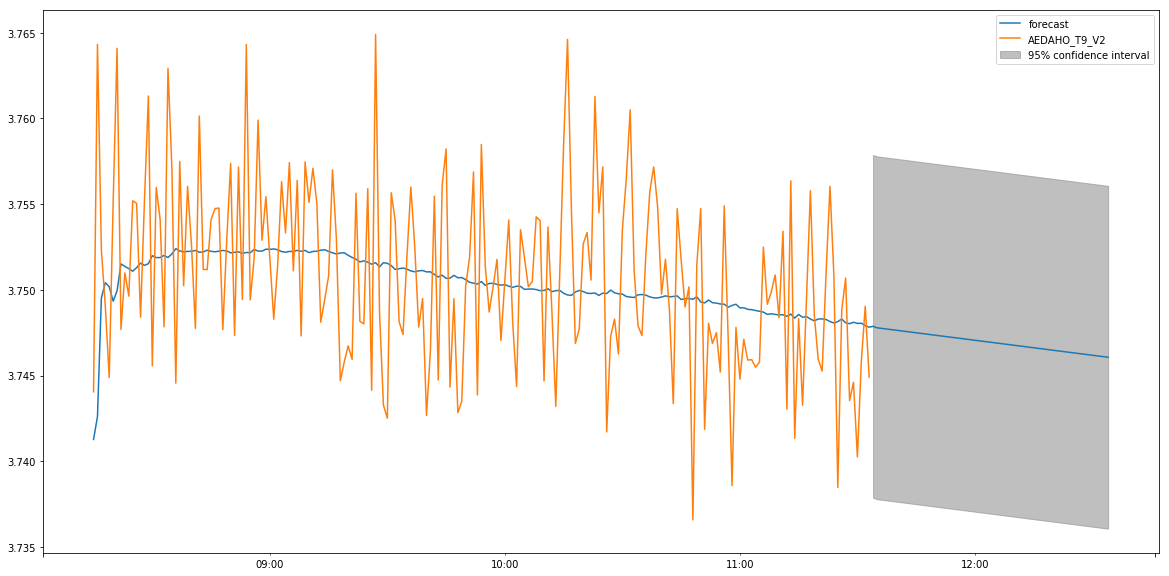

In [107]:
results_ARIMA.plot_predict(1,260)# 264 came how? look former output, 200 row. 200 + how many step??
x=results_ARIMA.forecast(steps=60)